# Question 1

Considere os dados apresentados na tabela abaixo. Determine os centroides dos aglomerados "clusters" presentes nos dados, fazendo uso do algoritmo da rede competitiva que corresponde ao algoritmo K-means. Para tanto considere os itens (a) - (c) referentes ao processo de inicialização.

<center>

Amostra   | $X_1$ | $X_2$ | $X_3$
:--------:|:-------:|:-------:|:------:
1         |-7.82  |-4.58  |-3.97
2         |-6.68  |3.16   |2.71
3         |4.36   |-2.19  |2.09
4         |6.72   |0.88   |2.80
5         |-8.64  |3.06   |3.50
6         |-6.87  |0.57   |-5.45
7         |4.47   |-2.62  |5.76
8         |6.73   |-2.01  |4.18
9         |-7.71  |2.34   |-6.33
10        |-6.91  |-0.49  |-5.68
11        |6.18   |2.81   |5.82
12        |6.72   |-0.93  |-4.04
13        |-6.25  |-0.26  |0.56
14        |-6.94  |-1.22  |1.13
15        |8.09   |0.20   |2.25
16        |6.81   |0.17   |-4.15
17        |-5.19  |4.24   |4.04
18        |-6.38  |-1.74  |1.43
19        |4.08   |1.30   |5.33
20        |6.27   |0.93   |-2.78
</center>

Authors: 
  - [Morsinaldo de Azevedo Medeiros](https://github.com/Morsinaldo)
  - [Thaís de Araújo de Medeiros](https://github.com/thaisaraujo2000)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Letra a) 

Considere que a rede possui três neurônios que correspondem à existência de três clusters nos dados. Inicialize os pesos dos neurônios (centroides) de forma aleatória

In [2]:
# putting the data in a matrix
x1 = [-7.82, -6.68, 4.36, 6.72, -8.64, -6.87, 4.47, 6.73, -7.71, -6.91, 6.18, 6.72, -6.25, -6.94, 8.09, 6.81, -5.19, -6.38, 4.08, 6.27]
x2 = [-4.58, 3.16, -2.19, 0.88, 3.06, 0.57, -2.62, -2.01, 2.34, -0.49, 2.81, -0.93, -0.26, -1.22, 0.20, 0.17, 4.24, -1.74, 1.30, 0.93]
x3 = [-3.97, 2.71, 2.09, 2.80, 3.50, -5.45, 5.76, 4.18, -6.33, -5.68, 5.82, -4.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]

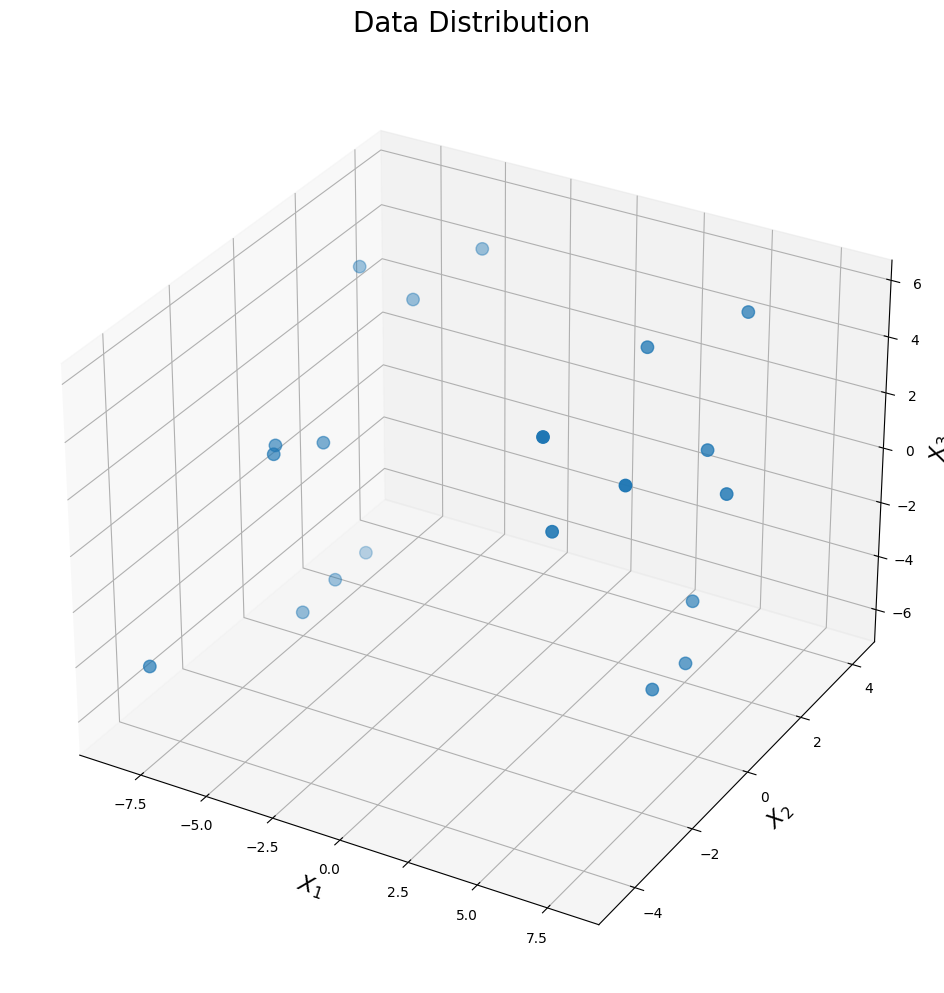

In [3]:
# plot the data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, s=80)
plt.title('Data Distribution', pad=20, size=20)
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)
plt.show()

In [4]:
# put the data in a dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de iterações realizadas até a convergência: 2
Centro 1: [ 6.043  -7.3275 -6.68  ]
Centro 2: [-0.146      -0.54        1.20666667]
Centro 3: [ 1.726      -5.3575      2.22833333]


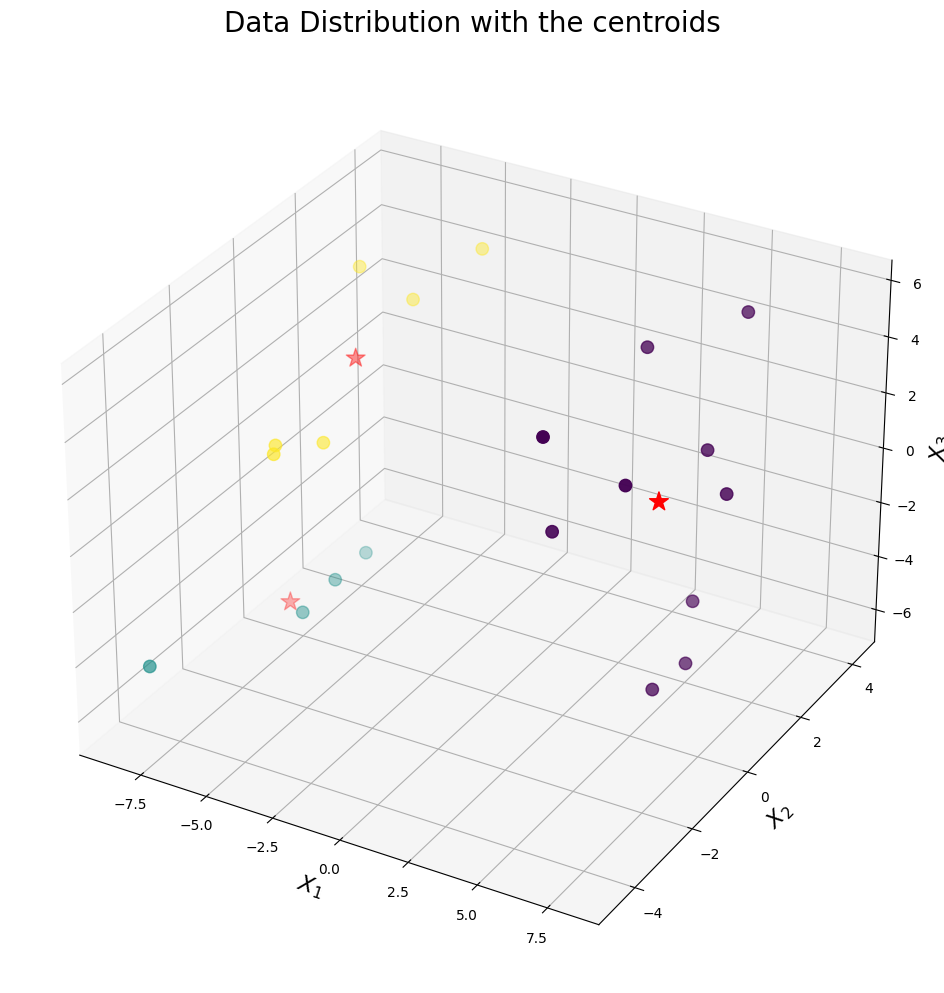

In [5]:
# instantiate the model
kmeans = KMeans(init='random', n_clusters=3, random_state=0, max_iter=1000)

# fit the model
kmeans.fit(df)

# get number of iterations
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")

# get centroids
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=80)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='*')
plt.title('Data Distribution with the centroids', pad=20, size=20)
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)
plt.show()

### Letra b)

Considere que existam três clusters e a inicialização dos centros seja dada por
$m_1=(0,0,0)^t, m_2=(1,1,1)^t, m_3=(-1,0,2)^t$.


In [6]:
# inicialize the model with the centroids in m1, m2 and m3
m1 = [[0],[0],[0]]
m2 = [[1],[1],[1]]
m3 = [[-1],[0],[2]]

init = np.concatenate((m1, m2, m3), axis=1)
init

array([[ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  1,  2]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=3.
  super()._check_params_vs_input(X, default_n_init=10)


Número de iterações realizadas até a convergência: 3
Centro 1: [-0.28166667 -6.84285714  5.80428571]
Centro 2: [ 0.43166667  0.38       -0.23285714]
Centro 3: [-4.73833333  1.34285714  4.03285714]


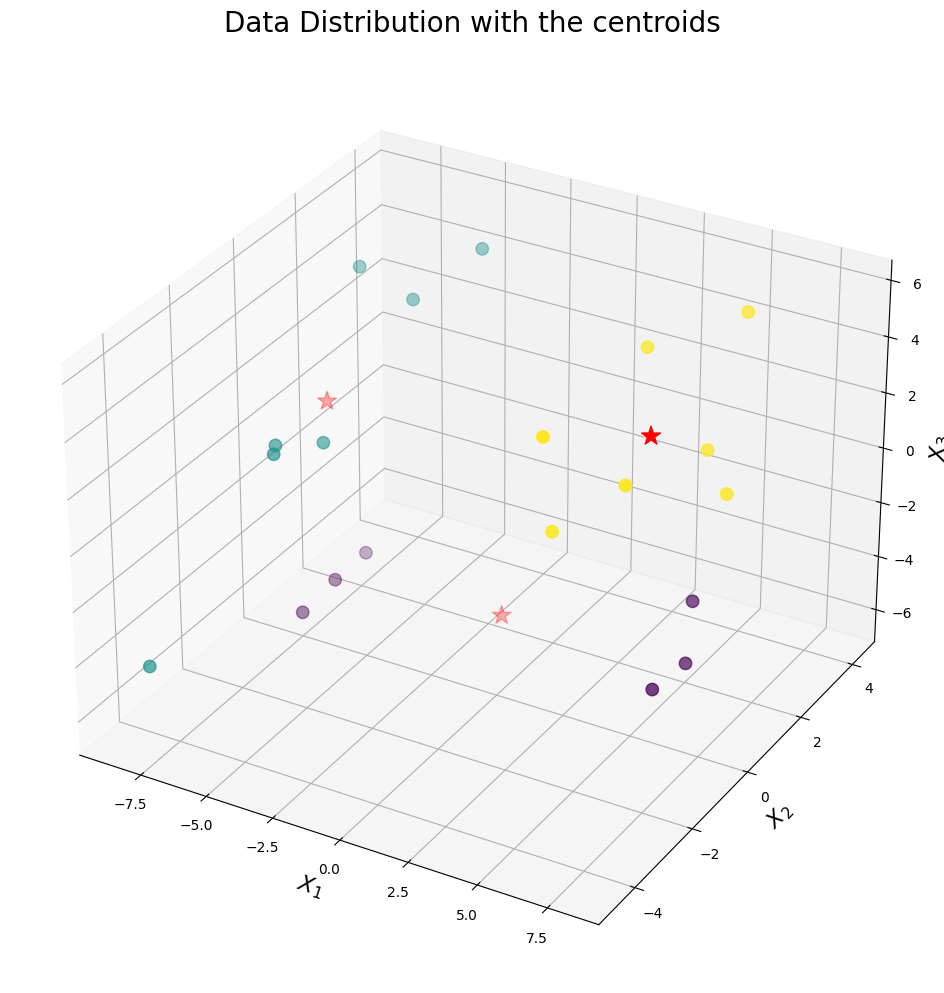

In [8]:
# instantiate the model
kmeans = KMeans(init=init, n_init=3, n_clusters=3, random_state=0, max_iter=1000)

# fit the model
kmeans.fit(df)

# get number of iterations
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")

# get centroids
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=80)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='*')
plt.title('Data Distribution with the centroids', pad=20, size=20)
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)
plt.show()

### Letra c)

Repita o item a considerando que os centros iniciais sejam $m_1=(-0.1,0,0.1)^t, m_2=(0,-
0.1,0.1)^t, m_3=(-0.1,-0.1,0.1)^t$. Compare o resultado obtido com o item (a) e explique a razão das diferenças, incluindo o número de interações para alcançar a convergência.

In [9]:
# inicialize the model with the centroids in m1, m2 and m3
m1 = [[-0.1],[0],[0.1]]
m2 = [[0],[-0.1],[0.1]]
m3 = [[-0.1],[-0.1],[0.1]]

init = np.concatenate((m1, m2, m3), axis=1)
init

array([[-0.1,  0. , -0.1],
       [ 0. , -0.1, -0.1],
       [ 0.1,  0.1,  0.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=3.
  super()._check_params_vs_input(X, default_n_init=10)


Número de iterações realizadas até a convergência: 3
Centro 1: [-6.939       6.6         5.80428571]
Centro 2: [ 0.508       0.05666667 -0.23285714]
Centro 3: [-0.806      -3.65666667  4.03285714]


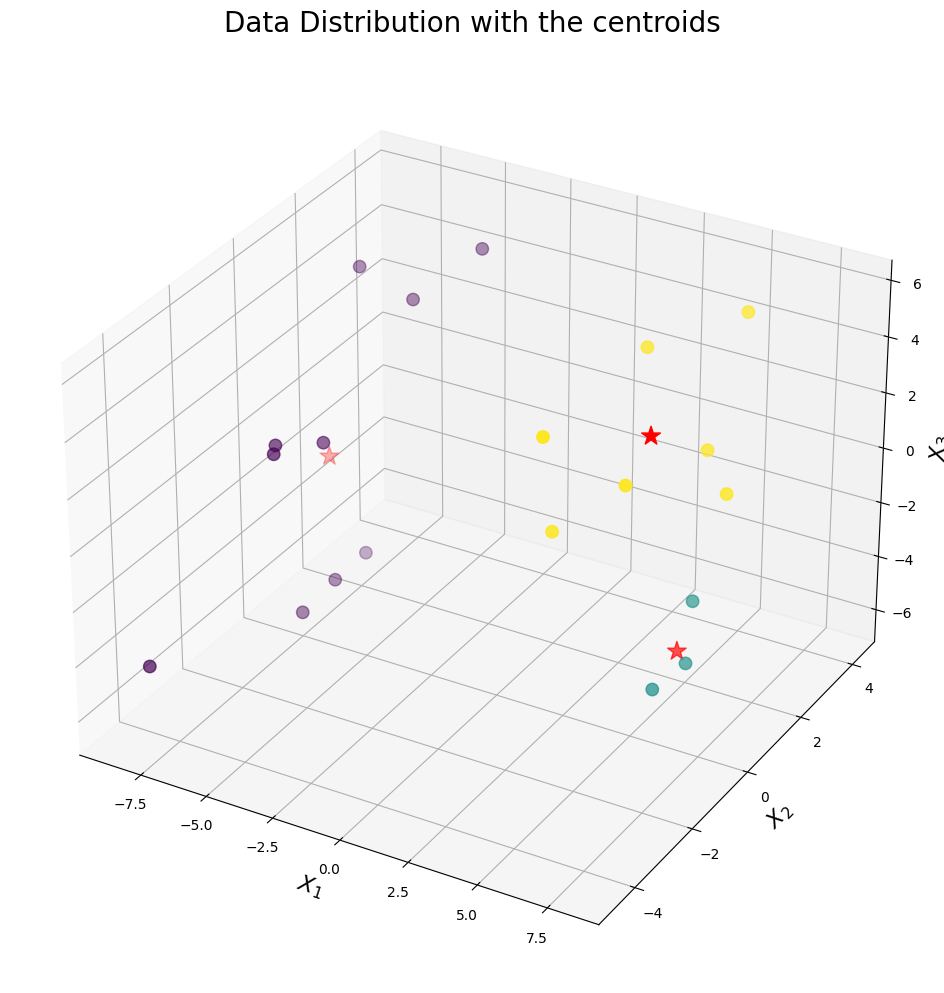

In [10]:
# instantiate the model
kmeans = KMeans(init=init, n_init=3, n_clusters=3, random_state=0, max_iter=1000)

# fit the model
kmeans.fit(df)

# get number of iterations
print(f"Número de iterações realizadas até a convergência: {kmeans.n_iter_}")

# get centroids
print(f"Centro 1: {kmeans.cluster_centers_[:, 0]}\nCentro 2: {kmeans.cluster_centers_[:, 1]}\nCentro 3: {kmeans.cluster_centers_[:, 2]}")

# get the labels
labels = kmeans.labels_

# plot the data hilighting the centroids
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, c=labels, s=80)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='*')
plt.title('Data Distribution with the centroids', pad=20, size=20)
ax.set_xlabel('$X_1$', fontsize=16)
ax.set_ylabel('$X_2$', fontsize=16)
ax.set_zlabel('$X_3$', fontsize=16)
plt.show()

### Conclusões

Com isso, é possível observar como o algoritmo K-means é sensível à inicialização dos centróides.

Na primeira execução, o algoritmo utilizado pela bilbioteca é o `K-Means++`, o qual tenta inicializar os centróides de forma mais espalhada, aumentando a probabilidade de se obter uma solução melhor. Para fazer isso, ele seleciona o primeiro centróide de forma aleatória e, em seguida, escolhe os centróides subsequentes com base na distância ponderada em relação aos centróides já selecionados.

Já a segunda e a terceira execução levaram cada uma a uma posição diferente dos centróides, bem como à um número de iterações maior até a convergência, sendo 2 na primeira e 3 para a segunda e terceira. Com isso, é possível observar que a escolha inicial dos centróides dos clusters pode afetar significativamente o resultado final do algoritmo e, dependendo da inicialização, o algoritmo pode convergir para diferentes soluções locais, o que significa que diferentes partições dos dados podem ser encontradas.